March 13th, 2025

## Reduced QLT hot electron whistler compare with [Kim et al. JGR 2017](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2016JA023558)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import wofz 
import scipy

In [2]:
%matplotlib inline
import matplotlib
font = {'family' : 'serif',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

In [3]:
def Z(xi):
    # plasma dispersion function
    return 1j * np.sqrt(np.pi) * wofz(xi)

### QLT equations $\Rightarrow$ Hot anisotropic electrons + immobile ions  
\begin{align*}
    q^2 &= \xi_{e}^{0} Z(\xi_{e}^{1})  + A_{e} \left( 1+ \xi_{e}^{1} Z(\xi_{e}^{1})\right)\Rightarrow \mathcal{F}(z; q, \beta_{\|e}, A_{e}) = 0 \\
    \frac{\mathrm{d} \beta_{\perp e}}{\mathrm{d} \tau} &= -2\int_{0}^{\infty} \frac{\mathcal{E}(q, \tau)}{q^2}  \left(\mathrm{Im}\{z\} \left(q^2 + A_{e} + 1 \right) +\mathrm{Im} \left\{\xi_{e}^{1} Z(\xi_{e}^{1}) \left(A_{e}z + z  - A_{e}\right)\right\}\right) \mathrm{d} q, \nonumber\\
    \frac{\mathrm{d} \beta_{\| e}}{\mathrm{d} \tau} &=-2\frac{\mathrm{d} \beta_{\perp e}}{\mathrm{d} \tau} - 4 \int_{0}^{\infty} \mathcal{E}(q, \tau) \mathrm{Im} \{ z\} \mathrm{d} q \\
    \partial_{\tau} \mathcal{E}(q, \tau) &= 2 \mathrm{Im}\{z\} \mathcal{E}(q, \tau)
\end{align*}

Numerical setup


**Run 1**: $\Omega_{ce}/\omega_{pe} = 0.1, \beta_{\|e}(t=0) = 0.5, A_{e}(t=0) = 3$

**Run 2**: $\Omega_{ce}/\omega_{pe} = \sqrt{0.005}, \beta_{\|e}(t=0) =1, A_{e}(t=0) = 3$

**Run 3**: $\Omega_{ce}/\omega_{pe} = 0.05, \beta_{\|e}(t=0) = 2, A_{e}(t=0) = 3$

We choose 100 $q$'s, corresponding to those of whistler mode waves with frequency between (0 and 1.8), and assume a small initial noise level (e.g., by setting $\mathcal{E}(q, \tau=0) = 10^{-4}$).

We proceed to normalize the physical quantities as follows:
\begin{equation*}
   \tau \coloneqq t |\Omega_{ce}|, \qquad z \coloneqq \frac{\omega}{|\Omega_{ce}|}, \qquad q \coloneqq \frac{c|k_{\|}|}{\omega_{pe}} = d_{e} |k_{\|}|, \qquad \beta = \frac{8 \pi n_{0} T}{B_{0}^2} , \qquad \mathcal{E}  \coloneqq \frac{|\delta \vec{\hat{B}}(k_{\|}, t)|^2}{d_{e} B_{0}^2} \qquad \Rightarrow \qquad \xi_{e}^{0} = \frac{z}{q \sqrt{\beta_{\|e}}}, \qquad \xi_{e}^{1} = \frac{z-1}{q\sqrt{\beta_{\|e}}}
\end{equation*}

In [224]:
# Run 1 
beta_par_init = 0.5 # initial beta parallel 
A_init = 3 # initial anisotropic level 
# plotting purposes
run_num = 1
t_max = 500

# # Run 2
# beta_par_init = 1 # initial beta parallel 
# A_init = 3 # initial anisotropic level 
# # plotting purposes
# run_num = 2
# t_max = 200

# # Run 3
# beta_par_init = 2 # initial beta parallel
# A_init = 3 # initial anisotropic level 
# # plotting purposes
# run_num = 3 
# t_max = 100

beta_perp_init =  (A_init + 1) * beta_par_init  # initial beta perpendicular 
q_vec = np.linspace(0.01, 2, 50) # vector with all normalized wavenumbers
dB_init = 1e-6 * np.ones(len(q_vec)) # initial wave energy density noise level

In [225]:
def xi_0(z, q, beta_par):
    return z/(np.abs(q)*np.sqrt(beta_par))

def xi_1(z, q, beta_par):
    return (z-1)/(np.abs(q)*np.sqrt(beta_par))

In [226]:
# dispersion relation 
def dispersion_relation(q, beta_par, A):
    return lambda z : q**2 - xi_0(z=z, q=q, beta_par=beta_par) * Z(xi=xi_1(z, q=q, beta_par=beta_par)) - A * (1 + xi_1(z=z, q=q, beta_par=beta_par) * Z(xi=xi_1(z=z, q=q, beta_par=beta_par)))

In [227]:
q_curr = -0.5
sol = scipy.optimize.newton(dispersion_relation(q=q_curr, A=A_init, beta_par=beta_par_init), 0.4-0.001j, maxiter=10000)
print("omega_k + i gamma = ", sol)
print("dispersion residual = ", abs(dispersion_relation(q=q_curr, A=A_init, beta_par=beta_par_init)(sol)))

omega_k + i gamma =  (0.4106627107375402+0.15105471569355958j)
dispersion residual =  4.313898676629927e-14


In [228]:
def get_z_vec(q_vec, A, beta_par):
    z_vec = np.zeros(len(q_vec), dtype="complex128")
    for ii, q in enumerate(q_vec):
        z_vec[ii] = scipy.optimize.newton(dispersion_relation(q=q, A=A, beta_par=beta_par), 0.5+ 0.001j, maxiter=10000)
        if dispersion_relation(q=q, A=A, beta_par=beta_par)(z_vec[ii]) > 1e-10:
            print(np.abs(dispersion_relation(q=q, A=A, beta_par=beta_par)(z_vec[ii])))
    return z_vec

In [229]:
sol_ = get_z_vec(q_vec=q_vec, A=A_init, beta_par=beta_par_init)

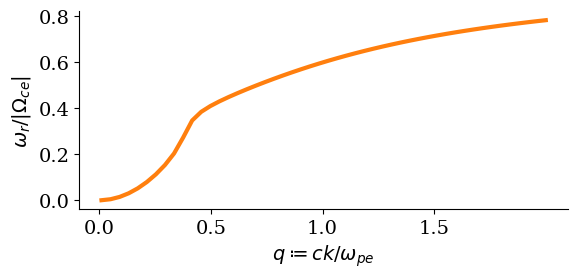

In [230]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(q_vec, sol_.real, linewidth=3, color="tab:orange")
ax.set_ylabel('$\omega_r/|\Omega_{ce}|$')
ax.set_xlabel(r'$q\coloneq ck/ \omega_{pe}$')
ax.set_xticks([0, 0.5, 1, 1.5])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()
plt.savefig("figs/whistler_run" + str(run_num) + "_wr.png", dpi=300, bbox_inches='tight')

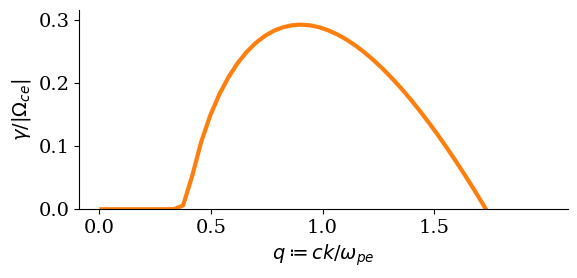

In [231]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(q_vec, sol_.imag, color="tab:orange", linewidth=3)
ax.set_ylabel('$\gamma/|\Omega_{ce}|$', rotation=90)
ax.set_xlabel(r'$q\coloneq ck/ \omega_{pe}$')
ax.set_xticks([0, 0.5, 1, 1.5])
ax.set_ylim(0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()
plt.savefig("figs/whistler_run" + str(run_num) + "_gamma.png", dpi=300, bbox_inches='tight')

\begin{align*}
   (1) \qquad q^2 &= \xi_{e}^{0} Z(\xi_{e}^{1})  + A_{e} \left( 1+ \xi_{e}^{1} Z(\xi_{e}^{1})\right)\Rightarrow \mathcal{F}(z; q, \beta_{\|e}, A_{e}) = 0 \\
   (2) \qquad  \frac{\mathrm{d} \beta_{\perp e}}{\mathrm{d} \tau} &= -2\int_{0}^{\infty} \frac{\mathcal{E}(q, \tau)}{q^2}  \left(\mathrm{Im}\{z\} \left(q^2 + A_{e} + 1 \right) +\mathrm{Im} \left\{\xi_{e}^{1} Z(\xi_{e}^{1}) \left(A_{e}z + z  - A_{e}\right)\right\}\right) \mathrm{d} q, \nonumber\\
   (3) \qquad  \frac{\mathrm{d} \beta_{\| e}}{\mathrm{d} \tau} &=-2\frac{\mathrm{d} \beta_{\perp e}}{\mathrm{d} \tau} - 4 \int_{0}^{\infty} \mathcal{E}(q, \tau) \mathrm{Im} \{ z\} \mathrm{d} q \\
   (4) \qquad  \partial_{\tau} \mathcal{E}(q, \tau) &= 2 \mathrm{Im}\{z\} \mathcal{E}(q, \tau)
\end{align*}


In [232]:
def dB_dt(gamma, B_vec):
    # Eq. (4) rhs
    return 2*gamma*B_vec

In [233]:
def dbetaperp_dt(A, q_vec, B_vec, z_vec, dq, beta_par):
    # Eq. (2) rhs
    rhs = np.zeros(len(q_vec)) 
    for ii in range(len(q_vec)):
        xi_1_e = xi_1(z=z_vec[ii], q=q_vec[ii], beta_par=beta_par) 
        rhs[ii] = (B_vec[ii] / (q_vec[ii]**2)) *(z_vec[ii].imag * (q_vec[ii]**2 + A + 1) + (xi_1_e*Z(xi=xi_1_e)*(A*z_vec[ii] + z_vec[ii] - A)).imag)
    return -  2 *  np.sum((rhs[:-1] + rhs[1:]) * 0.5 * dq)

In [234]:
def dbetapar_dt(A, q_vec, B_vec, z_vec, dq, beta_par):
    # Eq. (3) rhs
    rhs =  np.zeros(len(q_vec))  
    for ii in range(len(q_vec)):
        rhs[ii] = B_vec[ii]*z_vec[ii].imag
    return -2 * dbetaperp_dt(A=A, q_vec=q_vec, B_vec=B_vec, z_vec=z_vec, dq=dq, beta_par=beta_par) - 4 * np.sum((rhs[:-1] + rhs[1:]) * 0.5 * dq)

In [235]:
def dydt(t, f, q_vec):
    # Eq. (1)-(4) rhs
    # dispersion solver
    z_vec = get_z_vec(q_vec, A=f[0]/f[1]-1, beta_par=f[1])
    # beta perpendicular 
    rhs_beta_perp = dbetaperp_dt(A=f[0]/f[1]-1, q_vec=q_vec, B_vec=f[2:], z_vec=z_vec, dq=q_vec[1]-q_vec[0], beta_par=f[1])
    # beta parallel
    rhs_beta_par =  dbetapar_dt(A=f[0]/f[1]-1,  q_vec=q_vec, B_vec=f[2:], z_vec=z_vec, dq=q_vec[1]-q_vec[0], beta_par=f[1])
    # magnetic energy 
    rhs_B = dB_dt(gamma=z_vec.imag, B_vec=f[2:])
    return np.append(np.append(rhs_beta_perp, rhs_beta_par), rhs_B )

In [236]:
result = scipy.integrate.solve_ivp(fun=dydt, 
                                   t_span=[0, t_max], 
                                   y0=np.append(np.append(beta_perp_init, beta_par_init), dB_init), 
                                   args=(q_vec,),
                                   atol=1e-6, rtol=1e-6, method='BDF')

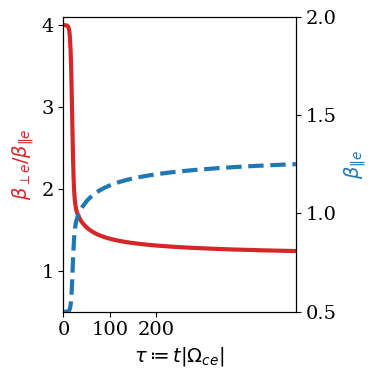

In [237]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.plot(result.t, result.y[0]/result.y[1], ls="-", color="tab:red", linewidth=3)

ax2 = ax.twinx()
ax2.plot(result.t, result.y[1], ls="--",  color="tab:blue", linewidth=3)

ax2.set_ylim(0.5, 2)
ax2.set_yticks([0.5, 1, 1.5, 2])

ax.set_ylim(0.5, 4.1)
ax.set_yticks([1, 2, 3, 4])

ax.set_xlim(0, t_max)
ax.set_xticks([0, 100, 200])

ax.set_xlabel(r'$\tau \coloneq t|\Omega_{ce}|$')
ax.set_ylabel(r'$\beta_{\perp e}/\beta_{\| e}$', color="tab:red")
ax2.set_ylabel(r'$\beta_{\| e}$', color="tab:blue")

plt.tight_layout()
plt.savefig("figs/whistler_run" + str(run_num) + "_beta.png", dpi=300, bbox_inches='tight')

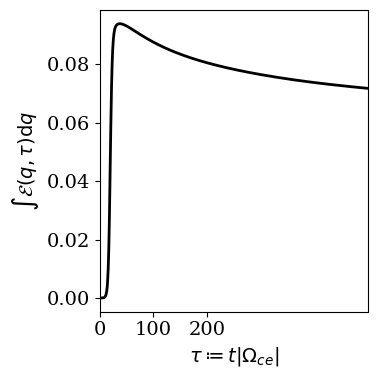

In [238]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(result.t, np.sum(result.y[2:, :], axis=0)*(q_vec[1]-q_vec[0]), color="black", linewidth=2)

#ax.set_yscale("log")
ax.set_xlabel(r'$\tau \coloneq t|\Omega_{ce}|$')
ax.set_ylabel(r'$\int \mathcal{E}(q, \tau) \mathrm{d} q$')

ax.set_xlim(0, t_max)
ax.set_xticks([0,100, 200])

plt.tight_layout()
plt.savefig("figs/whistler_run" + str(run_num) + "_dB.png", dpi=300, bbox_inches='tight')

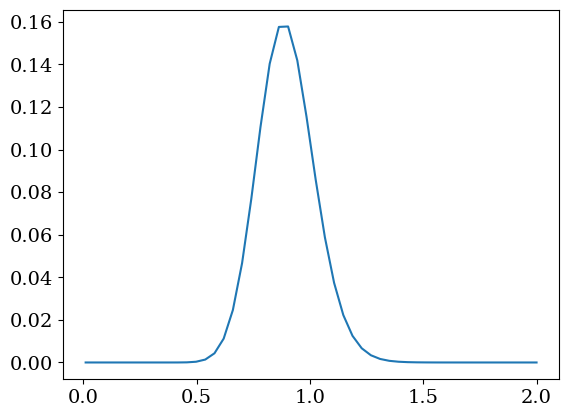

In [239]:
plt.plot(q_vec, result.y[2:, np.argmin(np.abs(result.t - 20))])
#plt.ylim(0, 0.6)

Text(0.5, 1.0, '$\\mathcal{E}(q, \\tau)$')

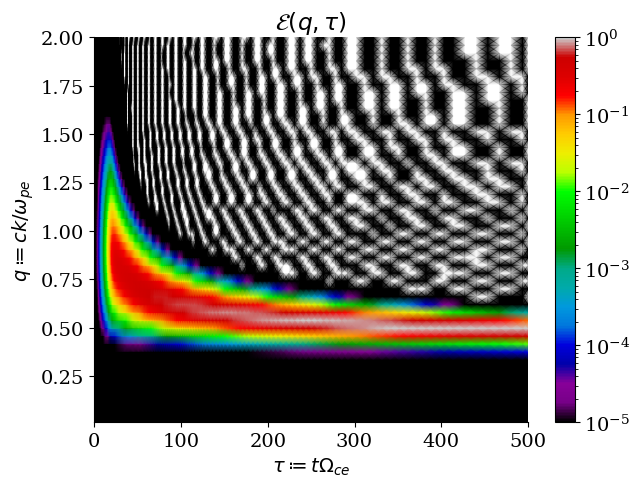

In [240]:
fig, ax = plt.subplots(figsize=(7, 5))
pos = ax.pcolormesh(result.t, q_vec, result.y[2:], cmap="nipy_spectral", norm=matplotlib.colors.LogNorm(vmin=1e-5, vmax=1e0),shading='gouraud')
cbar = fig.colorbar(pos)

ax.set_xlabel(r'$\tau \coloneq t\Omega_{ce}$')
ax.set_ylabel(r'$q \coloneq ck/\omega_{pe}$')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_title(r"$\mathcal{E}(q, \tau)$")

#plt.tight_layout()
#plt.savefig("figs/whistler_run" + str(run_num) + "_dB.png", dpi=300, bbox_inches='tight')